In [9]:
from __future__ import annotations

from dataclasses import dataclass
from typing import Iterable, List, Sequence, Tuple
import math

import matplotlib.pyplot as plt

EPSILON: float = 1e-12

# Um ponto 2D imutável
@dataclass(frozen=True, slots=True)
class Point:
    x: float
    y: float


def Cross(ax: float, ay: float, bx: float, by: float) -> float:
    return ax * by - ay * bx


def Orientation(a: Point, b: Point, c: Point) -> float:
    return Cross(b.x - a.x, b.y - a.y, c.x - a.x, c.y - a.y)


def DistanceSquared(a: Point, b: Point) -> float:
    dx = a.x - b.x
    dy = a.y - b.y
    return dx * dx + dy * dy


def LexicographicMin(points: Sequence[Point]) -> Point:
    return min(points, key=lambda p: (p.y, p.x))

# Ordena por ângulo polar em relação a 'anchor'; em empate de ângulo, mantém o ponto mais distante por último.
def PolarSort(points: Sequence[Point], anchor: Point) -> List[Point]:
    def angleKey(p: Point):
        return (math.atan2(p.y - anchor.y, p.x - anchor.x), DistanceSquared(anchor, p))

    filtered = [p for p in points if p != anchor]
    filtered.sort(key=angleKey)
    return filtered

# Computa o fecho convexo CCW via Graham Scan.
def GrahamScan(points: Iterable[Tuple[float, float]]) -> List[Point]:
    pts: List[Point] = [Point(float(x), float(y)) for x, y in points]
    unique = list(dict.fromkeys(pts))  # remove duplicados
    if len(unique) <= 1:
        return unique

    anchor = LexicographicMin(unique)
    ordered = PolarSort(unique, anchor)

    hull: List[Point] = [anchor]
    for p in ordered:
        while len(hull) >= 2 and Orientation(hull[-2], hull[-1], p) <= EPSILON:
            # Se colinear e mais distante, substitui a extremidade
            if abs(Orientation(hull[-2], hull[-1], p)) <= EPSILON:
                if DistanceSquared(hull[-2], p) > DistanceSquared(hull[-2], hull[-1]):
                    hull.pop()
                else:
                    break
            else:
                hull.pop()
        else:
            pass
        if not hull or hull[-1] != p:
            hull.append(p)

    if len(hull) >= 3 and Orientation(hull[-2], hull[-1], hull[0]) <= EPSILON:
        last = hull.pop()
        if Orientation(hull[-2], hull[-1], last) > EPSILON:
            hull.append(last)

    return hull


def PlotHull(points: Sequence[Tuple[float, float]], hull: Sequence[Point]) -> None:
    xs = [float(x) for x, _ in points]
    ys = [float(y) for _, y in points]

    plt.figure()
    plt.scatter(xs, ys)
    plt.title("Pontos (entrada)")
    plt.axis("equal")
    plt.show()

    if hull:
        hx = [p.x for p in hull] + [hull[0].x]
        hy = [p.y for p in hull] + [hull[0].y]
        plt.figure()
        plt.plot(hx, hy)
        plt.title("Fecho convexo — Graham Scan (CCW)")
        plt.axis("equal")
        plt.show()

Hull 1: [Point(x=0.0, y=0.0), Point(x=1.0, y=0.0), Point(x=1.0, y=1.0), Point(x=0.0, y=1.0)]


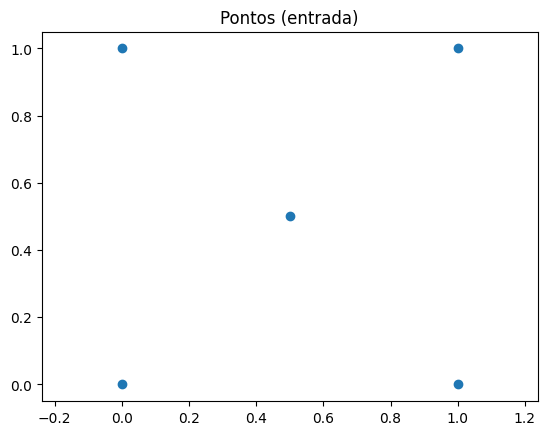

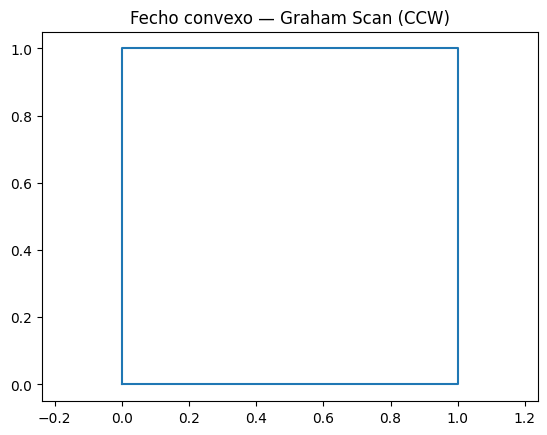

Hull 2: [Point(x=0.0, y=0.0), Point(x=2.0, y=0.0), Point(x=3.0, y=1.0), Point(x=2.0, y=2.0), Point(x=0.0, y=2.0)]


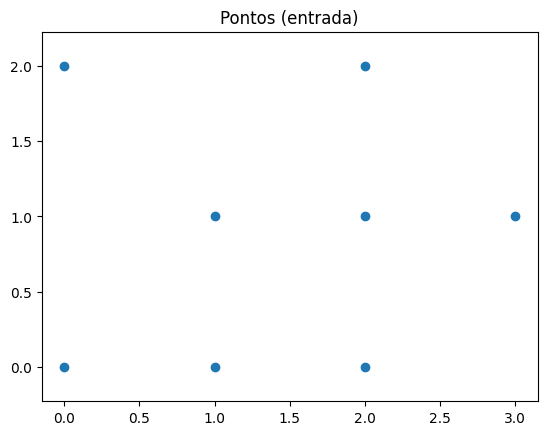

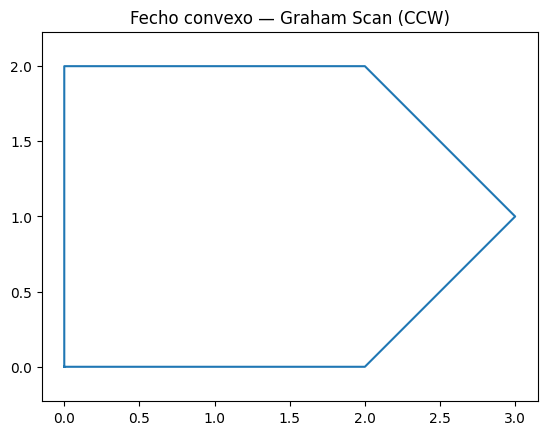

In [10]:
# Testando antes de importar curvas
from typing import List, Tuple

def RunExamples() -> None:
    pts1: List[Tuple[float, float]] = [(0, 0), (1, 0), (1, 1), (0, 1), (0.5, 0.5)]
    hull1 = GrahamScan(pts1)
    print("Hull 1:", hull1)
    PlotHull(pts1, hull1)

    pts2: List[Tuple[float, float]] = [
        (0, 0), (2, 0), (3, 1), (2, 2), (0, 2), (1, 1), (1, 0), (2, 1)
    ]
    hull2 = GrahamScan(pts2)
    print("Hull 2:", hull2)
    PlotHull(pts2, hull2)

RunExamples()

In [11]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


=== curvas1.txt ===
Curva 1: 9 pontos, comprimento ≈ 569.3907
  Bounding box: x ∈ [147.000, 690.000], y ∈ [129.000, 213.000]
Curva 2: 6 pontos, comprimento ≈ 525.9622
  Bounding box: x ∈ [148.000, 665.000], y ∈ [438.000, 483.000]
Curva 3: 6 pontos, comprimento ≈ 362.5721
  Bounding box: x ∈ [147.000, 213.000], y ∈ [152.000, 483.000]
Curva 4: 5 pontos, comprimento ≈ 366.2655
  Bounding box: x ∈ [633.000, 690.000], y ∈ [129.000, 479.000]


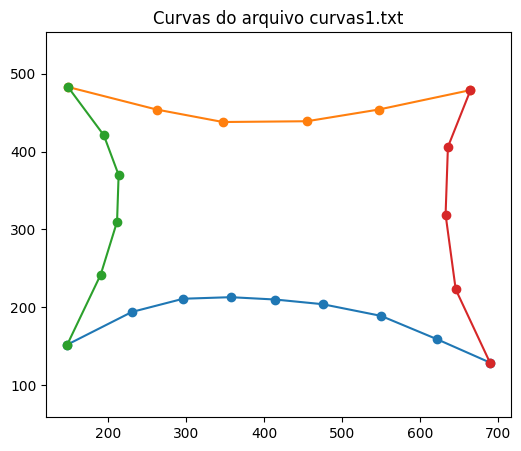

=== curvas2.txt ===
Curva 1: 2 pontos, comprimento ≈ 499.0090
  Bounding box: x ∈ [144.000, 643.000], y ∈ [158.000, 161.000]
Curva 2: 10 pontos, comprimento ≈ 561.0145
  Bounding box: x ∈ [136.000, 622.000], y ∈ [397.000, 530.000]
Curva 3: 7 pontos, comprimento ≈ 430.6610
  Bounding box: x ∈ [48.000, 144.000], y ∈ [158.000, 530.000]
Curva 4: 6 pontos, comprimento ≈ 374.1471
  Bounding box: x ∈ [622.000, 712.000], y ∈ [161.000, 490.000]


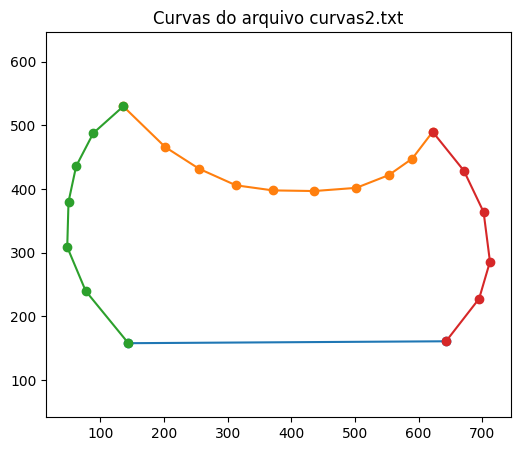

In [12]:
PATH_CURVAS_1 = "/content/curvas1.txt"
PATH_CURVAS_2 = "/content/curvas2.txt"

def loadCurves(path: str):
    with open(path, "r", encoding="utf-8") as file:
        lines = [ln.strip() for ln in file if ln.strip()]
    idx = 0
    curves = []
    for _ in range(4):
        n = int(lines[idx]); idx += 1
        pts = []
        for _ in range(n):
            x, y = map(float, lines[idx].split())
            pts.append((x, y))
            idx += 1
        curves.append(np.array(pts))
    return curves

def analyzeCurves(curves, label: str):
    print(f"=== {label} ===")
    for i, curve in enumerate(curves, 1):
        n_points = len(curve)
        xmin, ymin = np.min(curve, axis=0)
        xmax, ymax = np.max(curve, axis=0)
        length = np.sum(np.linalg.norm(np.diff(curve, axis=0), axis=1))
        print(f"Curva {i}: {n_points} pontos, comprimento ≈ {length:.4f}")
        print(f"  Bounding box: x ∈ [{xmin:.3f}, {xmax:.3f}], y ∈ [{ymin:.3f}, {ymax:.3f}]")

    # Visualização simples (sem definir cores específicas)
    plt.figure(figsize=(6, 5))
    for curve in curves:
        plt.plot(curve[:, 0], curve[:, 1], marker="o")
    plt.title(f"Curvas do arquivo {label}")
    plt.axis("equal")
    plt.show()

# Carregar e analisar curvas 1 e 2
curves1 = loadCurves(PATH_CURVAS_1)
curves2 = loadCurves(PATH_CURVAS_2)

analyzeCurves(curves1, "curvas1.txt")
analyzeCurves(curves2, "curvas2.txt")

In [13]:
def saveMeshVertices(vertices: np.ndarray, outputPath: str) -> None:
    nv, nu, _ = vertices.shape
    total = nv * nu
    with open(outputPath, "w", encoding="utf-8") as file:
        file.write(f"{total}\n")
        for j in range(nv):
            for i in range(nu):
                x, y = vertices[j, i]
                file.write(f"{x:.6f} {y:.6f}\n")
    print(f"Arquivo salvo: {outputPath}  ({total} vértices)")

# Parâmetros da malha
NU = 41  # divisões em u
NV = 21  # divisões em v

curves1 = loadCurves("/content/curvas1.txt")
curves2 = loadCurves("/content/curvas2.txt")

psi1, psi2, xi1, xi2 = curves1
vertices1 = bilinear_projector(psi1, psi2, xi1, xi2, NU=NU, NV=NV)
psi1b, psi2b, xi1b, xi2b = curves2
vertices2 = bilinear_projector(psi1b, psi2b, xi1b, xi2b, NU=NU, NV=NV)


saveMeshVertices(vertices1, "/content/malha1.txt")
saveMeshVertices(vertices2, "/content/malha2.txt")

Arquivo salvo: /content/malha1.txt  (861 vértices)
Arquivo salvo: /content/malha2.txt  (861 vértices)
